In [21]:
import PyCosmo
import numpy as np

In [22]:
cosmo = PyCosmo.build(l_max = 3)

[main]
model = LCDM
core_equations_files = ['/home/daniel/anaconda3/envs/math/lib/python3.10/site-packages/PyCosmo/CosmologyCore.py']
compilation_flags = -O3
default_ini_file = config/default_lcdm.ini

[equation_parameters]
l_max = 3
splits = None
reorder = True
cache hit at /home/daniel/_cache/PyCosmo/linux-x86_64/2_0_3/1_0_8__1b3a90.pkl
load wrapper from /home/daniel/_cache/sympy2c/1_0_8__np_1_21_5__linux-x86_64/0808ec34_fc3ec
Recombination set to Recfast++


In [23]:
cosmo.print_params()

---- cosmology ------------------------------------------------------------

  h (Dimensionless hubble parameter [1])       : 0.7
  omega_b (Baryon density [1])                 : 0.06
  omega_m (Matter density (DM+baryons) [1])    : 0.3
  omega_l (Dark energy density [1])            : 0.6999147067827016
  flat_universe (Assume flat universe [1])     : True
  n (Scalar spectral index [1])                : 1.0
  Tcmb (CMB Temperature [K])                   : 2.725
  Yp (Helim Fraction [1])                      : 0.24
  N_massless_nu (Number of massless neutrino
  species [1])                                 : 3.044
  N_massive_nu (Number of massive neutrino
  species [1])                                 : 0
  massive_nu_total_mass (Total mass of massive
  neutrinos [eV])                              : 0.0
  wa (Present DE of equation of state)         : 0.0
  w0 (Time depenedent parameter of DE equation
  of state)                                    : -1.0

---- recombination -----------

In [24]:
a = 0.5
z = 1 / a - 1
cosmo.background.dist_rad_a(a) 

3303.5262800468654

In [25]:
cosmo.set(pk_type='boltz', pk_norm_type='A_s', pk_norm=2.1e-9)

Recombination set to Recfast++
Parameters updated


/home/daniel/anaconda3/envs/math/lib/python3.10/site-packages/PyCosmo/Cosmo.py:351: UserWarning: disabled non-linear perturbations which are not working with the Boltzmann solver yet
  warnings.warn(


In [26]:
a = np.logspace(-5,0,500)
fields = cosmo.lin_pert.fields(k=1e-2, grid=np.log(a))

print(fields.Phi)

[-0.6981111  -0.69806499 -0.69801769 -0.69796982 -0.69792193 -0.69787332
 -0.69782401 -0.69777399 -0.69772326 -0.69767187 -0.69761979 -0.69756703
 -0.69751357 -0.69745942 -0.69740444 -0.6973481  -0.69729083 -0.69723263
 -0.69717351 -0.69711347 -0.69705194 -0.69698885 -0.69692452 -0.69685895
 -0.69679215 -0.69672412 -0.69665383 -0.69658198 -0.69650857 -0.69643362
 -0.69635711 -0.69627899 -0.69619916 -0.69611771 -0.69603463 -0.69594993
 -0.69586203 -0.69577157 -0.69567879 -0.6955837  -0.69548603 -0.69538534
 -0.69528202 -0.69517607 -0.69506749 -0.69495592 -0.69484149 -0.69472426
 -0.69460424 -0.69448131 -0.6943552  -0.69422613 -0.6940941  -0.69395911
 -0.69382113 -0.69367927 -0.69353437 -0.69338638 -0.69323504 -0.69307959
 -0.69292035 -0.69275721 -0.69259002 -0.69241863 -0.69224263 -0.69206203
 -0.69187666 -0.69168637 -0.691491   -0.69129164 -0.69108779 -0.69087929
 -0.69066609 -0.69044817 -0.69022571 -0.68999871 -0.68976709 -0.68953085
 -0.68928999 -0.6890442  -0.68879319 -0.68853719 -0

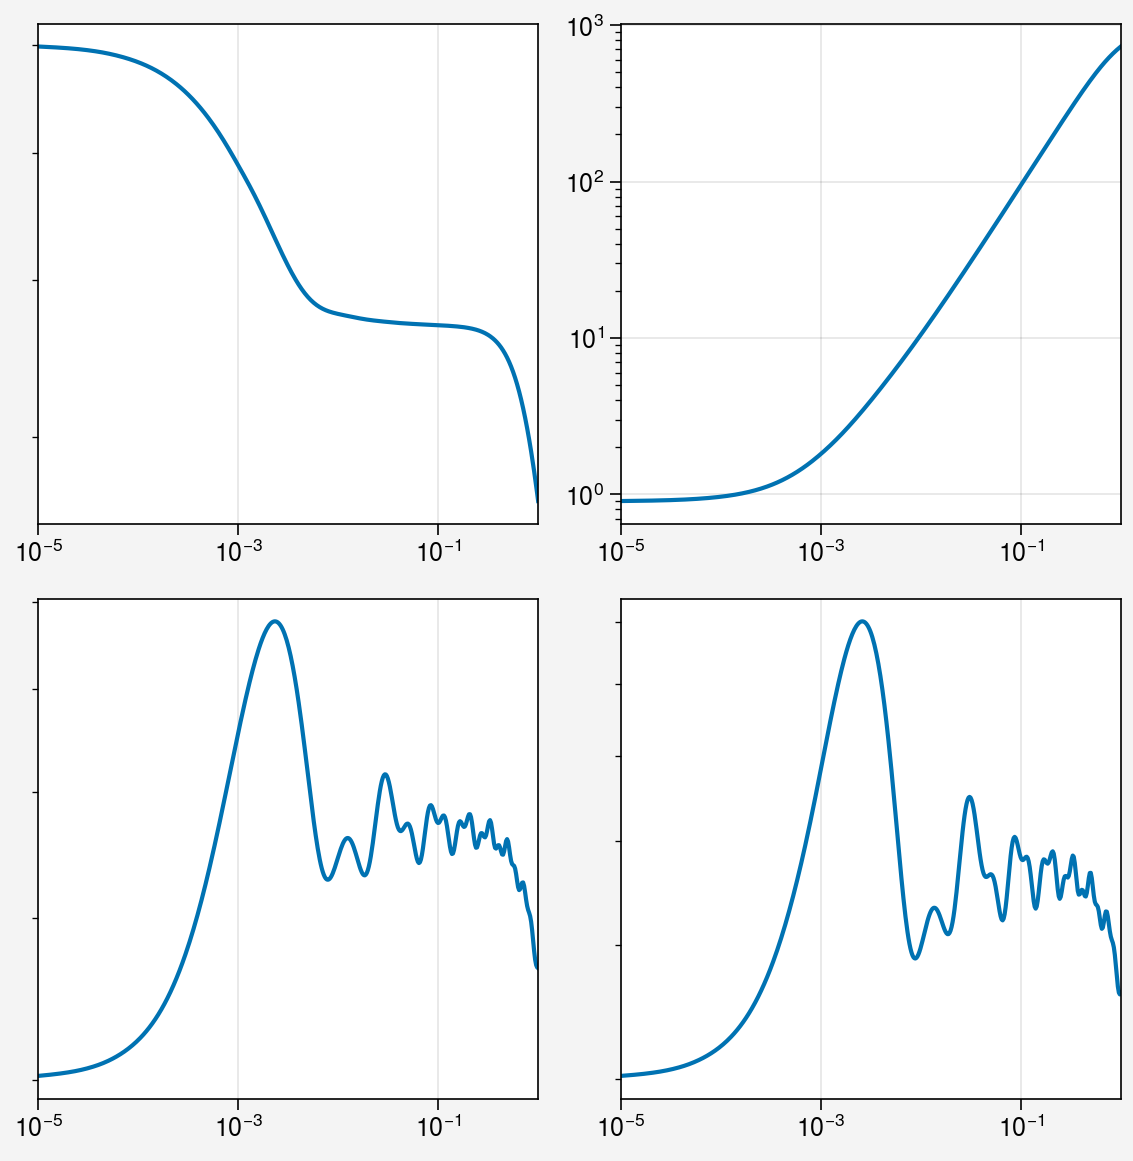

In [27]:
%matplotlib inline
import proplot as pplt

fig, ax = pplt.subplots(nrows=2, ncols=2, share=0)
ax[0].loglog(a, -fields.Phi)
ax[1].loglog(a, -fields.delta)
ax[2].loglog(a, -fields.N[0])
ax[3].loglog(a, -fields.Theta[0])
ax.format(xformatter = 'log', yformatter = 'log')